In [1]:
#import libraries and data

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from pandas.plotting import scatter_matrix
import pickle


import sklearn.ensemble as ske 
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeClassifier

#Grid and Random Search
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc 



import warnings
warnings.filterwarnings('ignore')


train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set  = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [3]:
#view train and test data samples
train_set.sample(4,random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [4]:
test_set.sample(4,random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K.
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K.
9933,54,Local-gov,116428,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


In [5]:
#checking for null values in train and test dataset
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [6]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
pd.DataFrame([train_set.dtypes,test_set.dtypes],index=['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [8]:
#finding datacolumns with datatypes as object

for i in train_set.columns:
    if train_set[i].dtypes == 'object':
        print(i)


workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [9]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [12]:
train_set.workclass.nunique(),train_set.education.nunique(),train_set.marital_status.nunique(),train_set.native_country.nunique()

(9, 16, 7, 42)

In [13]:
X_train = train_set.copy()
X_test = test_set.copy()

In [14]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [15]:
Sample = X_train.append(X_test)

In [16]:
#Summary Statistics of Continuous Values
Sample.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
#Summary Statistics of Categorical Values
Sample.describe(include=['O']) 

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


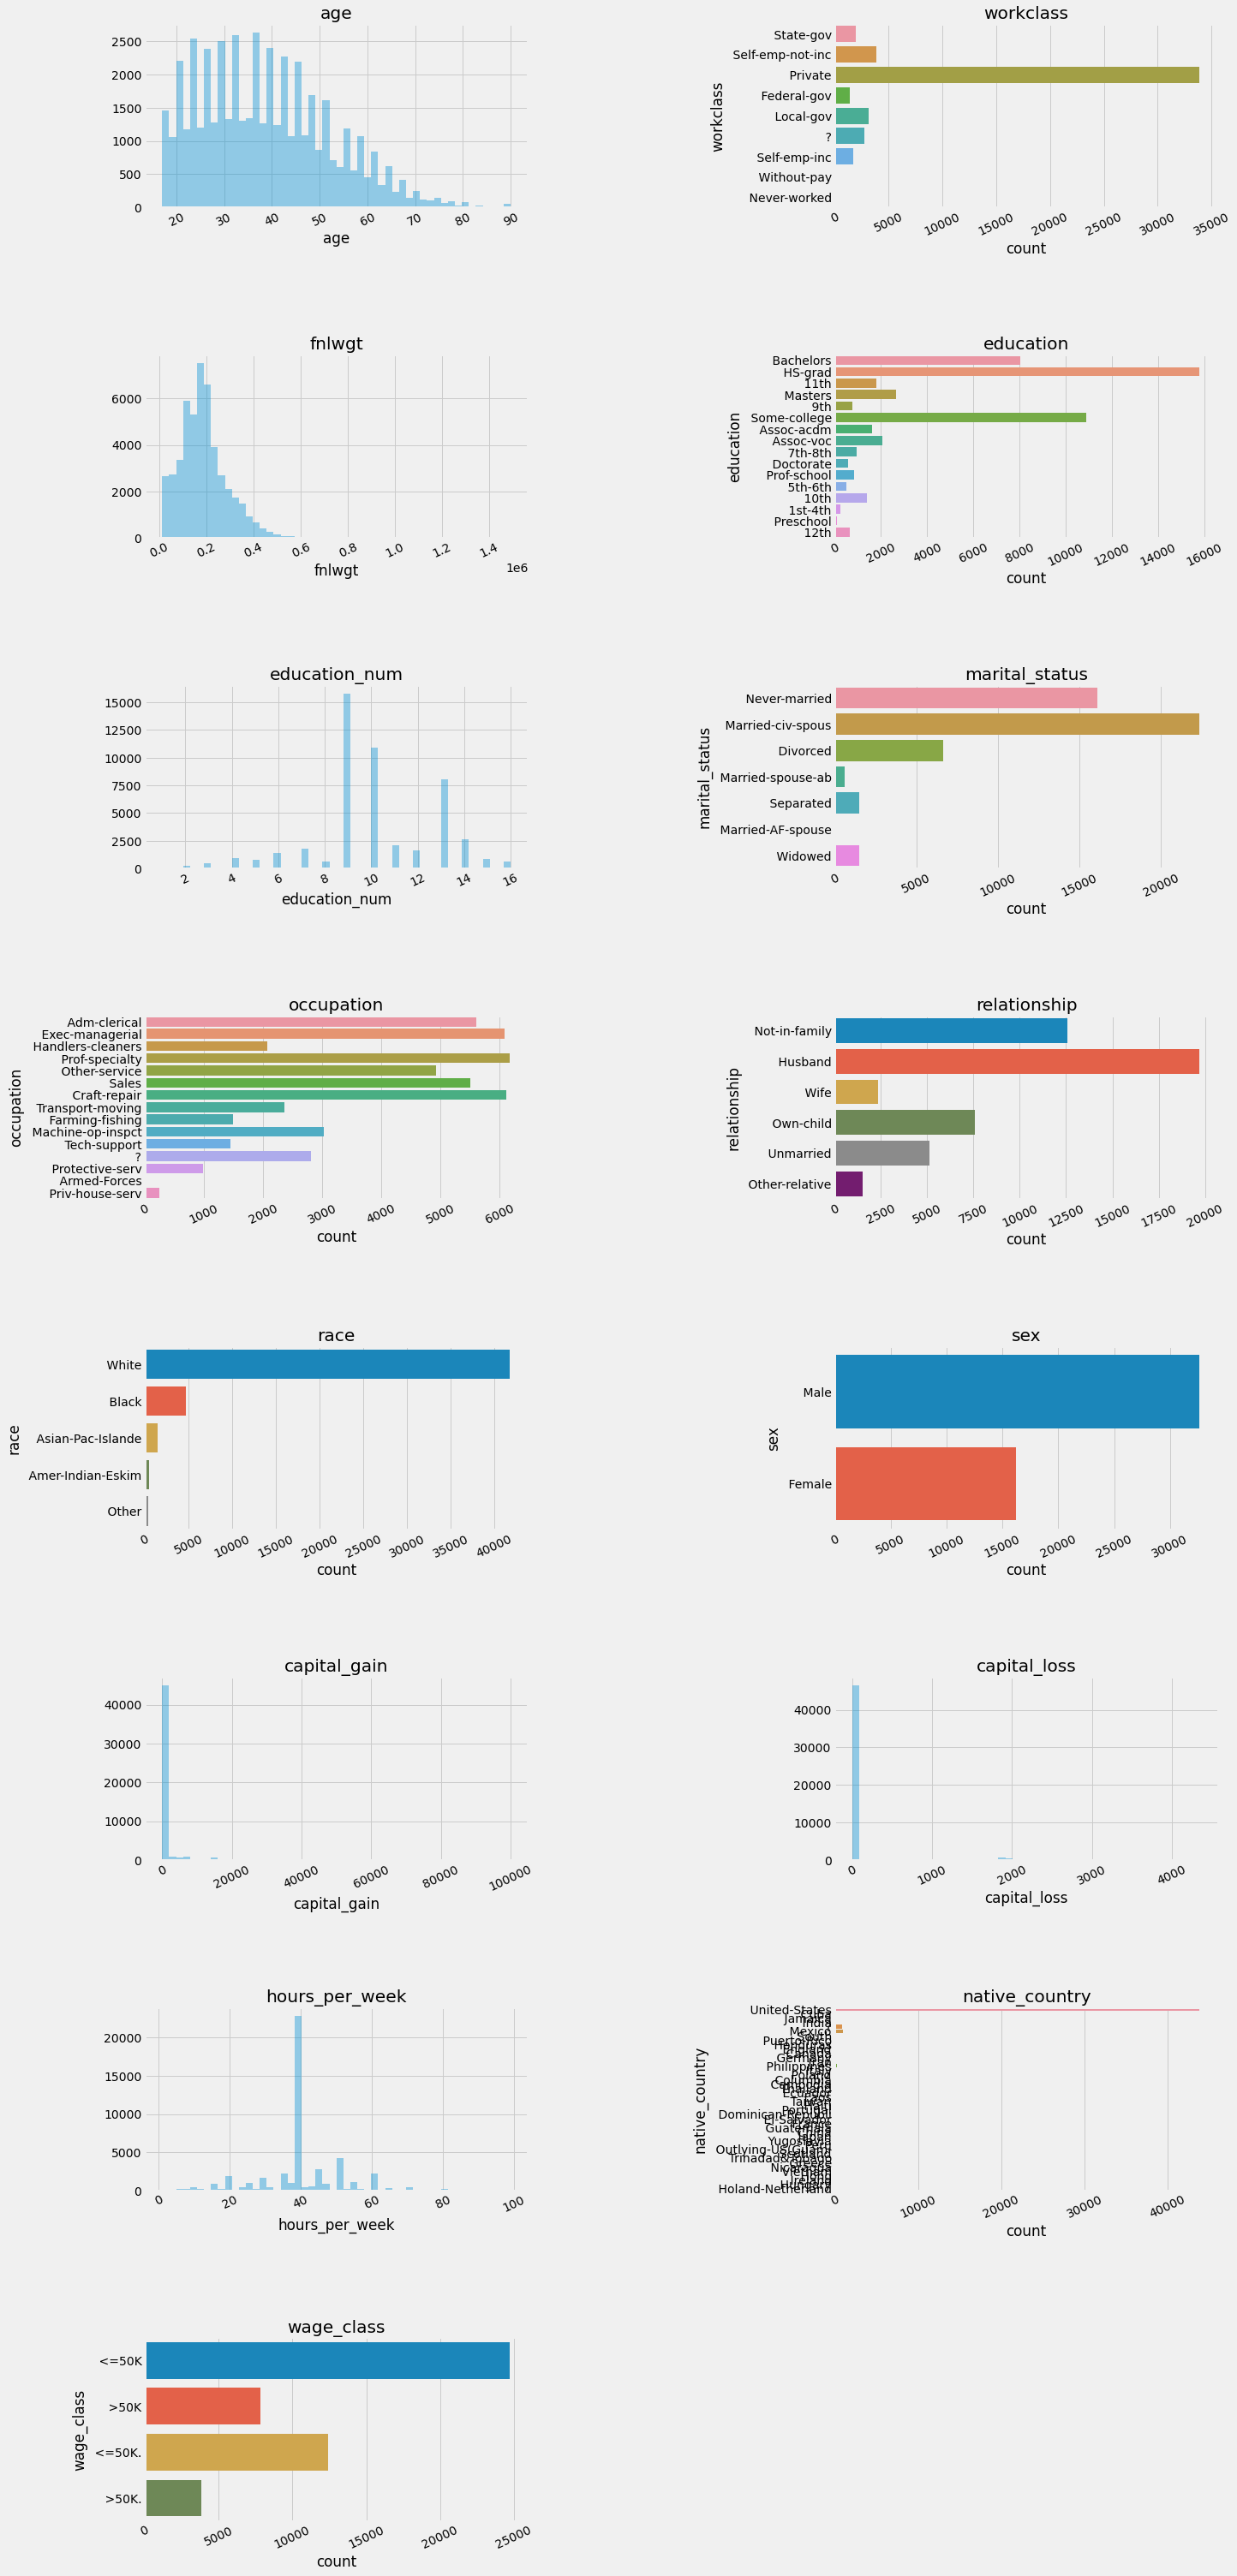

In [18]:

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5): 
    plt.style.use('fivethirtyeight') 
    fig = plt.figure(figsize=(width,height)) 
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols) 
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1) 
        ax.set_title(column) 
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset) 
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()] 
            g.set(yticklabels=substrings) 
            plt.xticks(rotation=25) 
            #plt.show() 
        else: 
            g = sns.distplot(dataset[column], kde=False) 
            plt.xticks(rotation=25) 
            #plt.show() 
            
plot_distribution(Sample, cols=2, width=20, height=50, hspace=0.8, wspace=0.8)




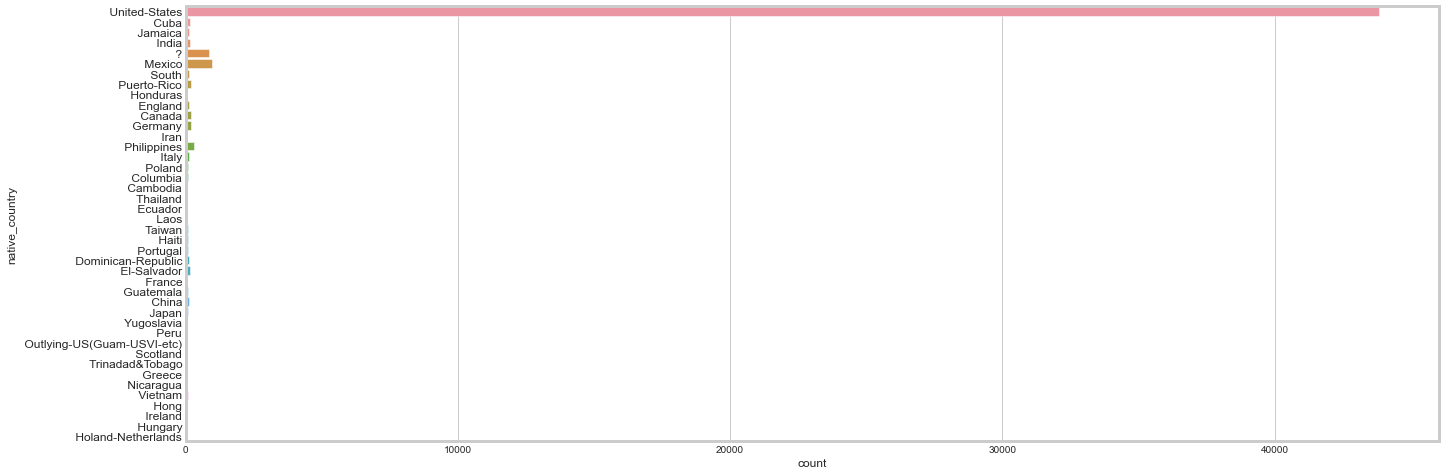

In [19]:
sns.set_style('whitegrid') 
%matplotlib inline 
plt.figure(figsize=(20,8))
g = sns.countplot(y='native_country',data=Sample)

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) 
plt.show()

In [20]:
print("Note:The data pertaining to native country, workclass and occupation has few unknown values represented by '?'.")

Note:The data pertaining to native country, workclass and occupation has few unknown values represented by '?'.


In [21]:
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan)) 
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

In [22]:
train_set.isnull().sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [23]:
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [24]:
test_set.isnull().sum(),train_set.isnull().sum()

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64, age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

In [25]:
#converting categorical columns into numerical columns

dict_sex={}
count = 0
for i in X_train.sex.unique():
    dict_sex[i]=count
    count+=1

In [26]:
dict_workclass={}
count = 0
for i in X_train.workclass.unique():
    dict_workclass[i]=count
    count+=1

In [27]:
dict_education={}
count = 0
for i in X_train.education.unique():
    dict_education[i]=count
    count+=1

In [28]:
dict_marital_status={}
count = 0
for i in X_train.marital_status.unique():
    dict_marital_status[i]=count
    count+=1

In [29]:
dict_occupation={}
count = 0
for i in X_train.occupation.unique():
    dict_occupation[i]=count
    count+=1

In [30]:
dict_relationship={}
count = 0
for i in X_train.relationship.unique():
    dict_relationship[i]=count
    count+=1

In [31]:
dict_race={}
count = 0
for i in X_train.race.unique():
    dict_race[i]=count
    count+=1

In [32]:
dict_native_country={}
count = 0
for i in X_train.native_country.unique():
    dict_native_country[i]=count
    count+=1

In [33]:
dict_wage_class={}
count = 0
for i in X_train.wage_class.unique():
    dict_wage_class[i]=count
    count+=1

In [34]:
dict_sex,dict_education,dict_wage_class,dict_native_country,dict_race,dict_occupation ,dict_marital_status 

({' Male': 0, ' Female': 1},
 {' Bachelors': 0,
  ' HS-grad': 1,
  ' 11th': 2,
  ' Masters': 3,
  ' 9th': 4,
  ' Some-college': 5,
  ' Assoc-acdm': 6,
  ' Assoc-voc': 7,
  ' 7th-8th': 8,
  ' Doctorate': 9,
  ' Prof-school': 10,
  ' 5th-6th': 11,
  ' 10th': 12,
  ' 1st-4th': 13,
  ' Preschool': 14,
  ' 12th': 15},
 {' <=50K': 0, ' >50K': 1},
 {' United-States': 0,
  ' Cuba': 1,
  ' Jamaica': 2,
  ' India': 3,
  ' ?': 4,
  ' Mexico': 5,
  ' South': 6,
  ' Puerto-Rico': 7,
  ' Honduras': 8,
  ' England': 9,
  ' Canada': 10,
  ' Germany': 11,
  ' Iran': 12,
  ' Philippines': 13,
  ' Italy': 14,
  ' Poland': 15,
  ' Columbia': 16,
  ' Cambodia': 17,
  ' Thailand': 18,
  ' Ecuador': 19,
  ' Laos': 20,
  ' Taiwan': 21,
  ' Haiti': 22,
  ' Portugal': 23,
  ' Dominican-Republic': 24,
  ' El-Salvador': 25,
  ' France': 26,
  ' Guatemala': 27,
  ' China': 28,
  ' Japan': 29,
  ' Yugoslavia': 30,
  ' Peru': 31,
  ' Outlying-US(Guam-USVI-etc)': 32,
  ' Scotland': 33,
  ' Trinadad&Tobago': 34,
  ' G

In [35]:
X_train['sex'] = X_train['sex'].map(dict_sex) 
X_train['education'] = X_train['education'].map(dict_education) 
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class) 
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['race'] = X_train['race'].map(dict_race) 
X_train['occupation']=X_train['occupation'].map(dict_occupation) 
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status) 
X_train['workclass'] = X_train['workclass'].map(dict_workclass) 
X_train['relationship'] = X_train['relationship'].map(dict_relationship) 

In [36]:
 X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [37]:
Xtrain = X_train.astype(int)

In [38]:
 X_train.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [39]:
X_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [40]:
print(X_train.wage_class.value_counts())
print(X_test.wage_class.value_counts())

0    24720
1     7841
Name: wage_class, dtype: int64
 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64


In [41]:
print("Note:The dataset seems to be almost balanced dataset with negative class around 76% and positive class with 24%")

Note:The dataset seems to be almost balanced dataset with negative class around 76% and positive class with 24%


In [42]:
# coverting test data categorical columns into numerical columns

dict_sex={}
count = 0
for i in X_test.sex.unique():
    dict_sex[i]=count
    count+=1

dict_workclass={}
count = 0
for i in X_test.workclass.unique():
    dict_workclass[i]=count
    count+=1

dict_education={}
count = 0
for i in X_test.education.unique():
    dict_education[i]=count
    count+=1
    
dict_marital_status={}
count = 0
for i in X_test.marital_status.unique():
    dict_marital_status[i]=count
    count+=1
    
dict_occupation={}
count = 0
for i in X_test.occupation.unique():
    dict_occupation[i]=count
    count+=1
    
    
dict_relationship={}
count = 0
for i in X_test.relationship.unique():
    dict_relationship[i]=count
    count+=1    

dict_race={}
count = 0
for i in X_test.race.unique():
    dict_race[i]=count
    count+=1
    
    
dict_native_country={}
count = 0
for i in X_test.native_country.unique():
    dict_native_country[i]=count
    count+=1
    
dict_wage_class={}
count = 0
for i in X_test.wage_class.unique():
    dict_wage_class[i]=count
    count+=1

In [43]:
dict_sex,dict_education,dict_wage_class,dict_native_country,dict_race,dict_occupation ,dict_marital_status 

({' Male': 0, ' Female': 1},
 {' 11th': 0,
  ' HS-grad': 1,
  ' Assoc-acdm': 2,
  ' Some-college': 3,
  ' 10th': 4,
  ' Prof-school': 5,
  ' 7th-8th': 6,
  ' Bachelors': 7,
  ' Masters': 8,
  ' Doctorate': 9,
  ' 5th-6th': 10,
  ' Assoc-voc': 11,
  ' 9th': 12,
  ' 12th': 13,
  ' 1st-4th': 14,
  ' Preschool': 15},
 {' <=50K.': 0, ' >50K.': 1},
 {' United-States': 0,
  ' ?': 1,
  ' Peru': 2,
  ' Guatemala': 3,
  ' Mexico': 4,
  ' Dominican-Republic': 5,
  ' Ireland': 6,
  ' Germany': 7,
  ' Philippines': 8,
  ' Thailand': 9,
  ' Haiti': 10,
  ' El-Salvador': 11,
  ' Puerto-Rico': 12,
  ' Vietnam': 13,
  ' South': 14,
  ' Columbia': 15,
  ' Japan': 16,
  ' India': 17,
  ' Cambodia': 18,
  ' Poland': 19,
  ' Laos': 20,
  ' England': 21,
  ' Cuba': 22,
  ' Taiwan': 23,
  ' Italy': 24,
  ' Canada': 25,
  ' Portugal': 26,
  ' China': 27,
  ' Nicaragua': 28,
  ' Honduras': 29,
  ' Iran': 30,
  ' Scotland': 31,
  ' Jamaica': 32,
  ' Ecuador': 33,
  ' Yugoslavia': 34,
  ' Hungary': 35,
  ' Hong'

In [44]:
X_test['sex'] = X_test['sex'].map(dict_sex) 
X_test['education'] = X_test['education'].map(dict_education) 
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class) 
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['race'] = X_test['race'].map(dict_race) 
X_test['occupation']=X_test['occupation'].map(dict_occupation) 
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status) 
X_test['workclass'] = X_test['workclass'].map(dict_workclass) 
X_test['relationship'] = X_test['relationship'].map(dict_relationship) 

In [45]:
 X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [46]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,3,10,1,0,1,0,0,7688,0,40,0,1
4,18,2,103497,3,10,0,3,0,1,1,0,0,30,0,0


In [47]:
X_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,0.969351,1.894357e+05,4.084639,10.072907,1.116455,6.411768,1.584239,0.979485,0.332965,1081.905104,87.899269,40.392236,1.219151,0.236226
std,13.849187,1.707976,1.057149e+05,3.446229,2.567545,1.182208,3.302738,1.194189,0.496000,0.471289,7583.935968,403.105286,12.479332,4.963702,0.424776
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.167360e+05,1.000000,9.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,1.778310e+05,3.000000,10.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.383840e+05,7.000000,12.000000,1.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


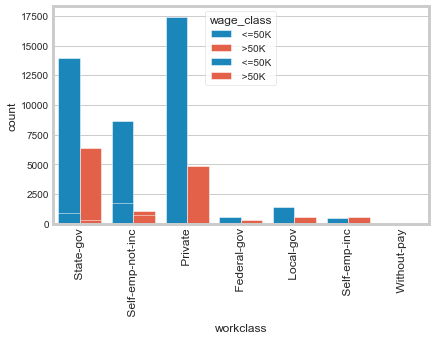

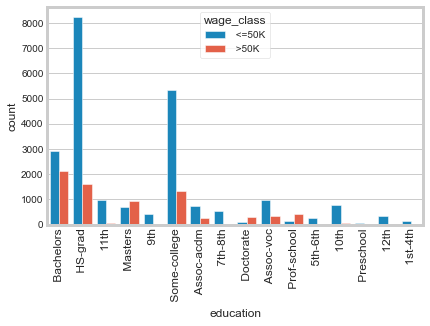

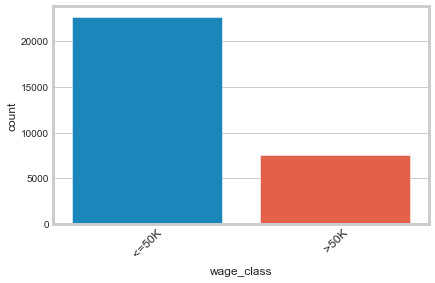

In [48]:
#Annual income visual analysis

plt.figure(figsize=(60,30))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot('sex',data = train_set,hue ="wage_class")

m = sns.countplot('workclass',data=train_set,hue='wage_class')
m.set_xticklabels(m.get_xticklabels(), rotation = 90, fontsize = 12) 
plt.show()

p = sns.countplot('education',data=train_set,hue='wage_class') 
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 12) 
plt.show()

r = sns.countplot('wage_class',data=train_set) 
r.set_xticklabels(r.get_xticklabels(), rotation = 45, fontsize = 12) 
plt.show()

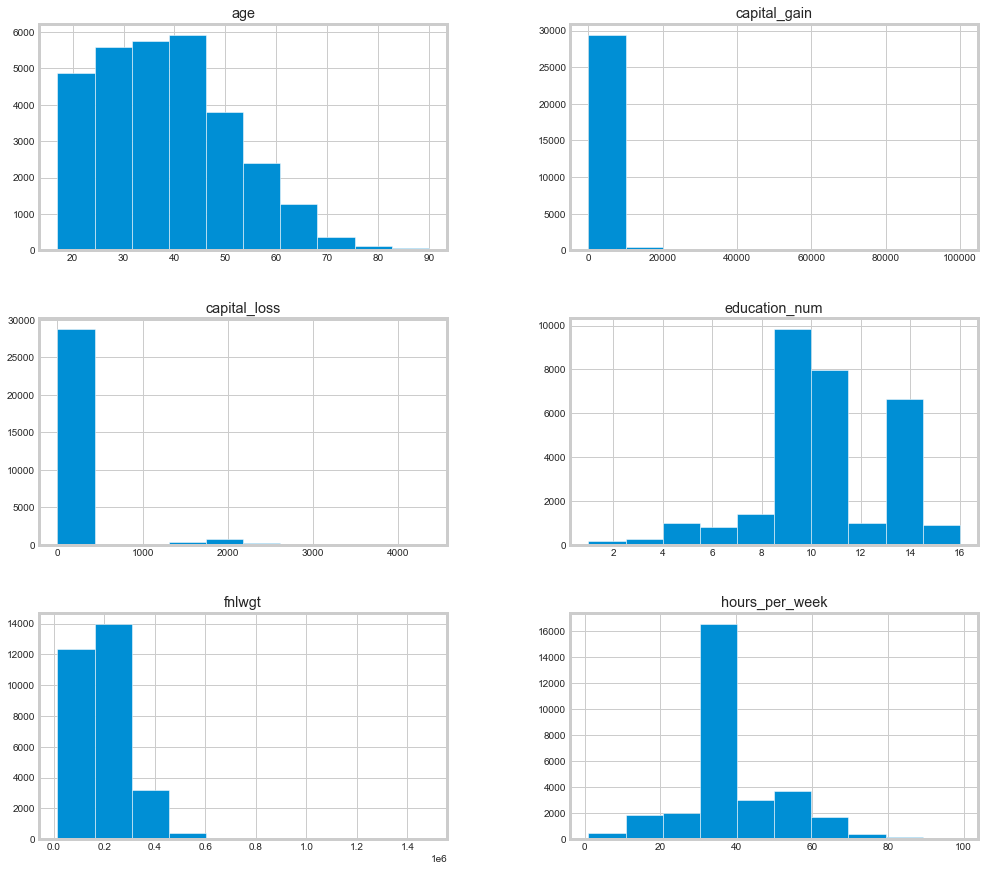

In [49]:
pd.DataFrame.hist(train_set,figsize=[15,15])
plt.show()

In [50]:
t = X_train.append(X_test)
t.wage_class.value_counts()

0    37155
1    11687
Name: wage_class, dtype: int64

In [51]:
Features = t.drop('wage_class',axis=1)
labels = t['wage_class']

In [52]:
Features.native_country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

In [53]:
#separating the training label and feature label from the training and test feature vaiables
x_train = X_train.drop('wage_class',axis=1) 
y_train = X_train['wage_class']

In [54]:
x_test = X_test.drop('wage_class',axis=1) 
y_test = X_test['wage_class']

In [55]:
#training feature and label 
X = x_train.values 
Y = y_train.values 

#Testing feature and label
Xtest = x_test.values
Ytest = y_test.values 

x_train.shape,y_train.shape,X.shape,Y.shape,Xtest.shape,Ytest.shape 

((32561, 14), (32561,), (32561, 14), (32561,), (16281, 14), (16281,))

In [56]:
Xtest

array([[    25,      0, 226802, ...,      0,     40,      0],
       [    38,      0,  89814, ...,      0,     50,      0],
       [    28,      1, 336951, ...,      0,     40,      0],
       ...,
       [    38,      0, 374983, ...,      0,     50,      0],
       [    44,      0,  83891, ...,      0,     40,      0],
       [    35,      6, 182148, ...,      0,     60,      0]], dtype=int64)

In [57]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso 
model_accuracy = {}
#Build the model 
LR = LogisticRegression()
#traing the model 
LR.fit(X,Y) 
#Model parameters study 
Ypred = LR.predict(Xtest)
Ypred_proba = LR.predict_proba(Xtest)
#generate evaluation metrics
print(metrics.accuracy_score(Ytest, Ypred)) 
model_accuracy['Logistic Regression'] = metrics.accuracy_score(Ytest, Ypred) 

0.7997665991032492


In [58]:

test_data =[] 
for i in x_test.columns:
    test_data.append(x_test[i].max()) 
print(test_data) 
test = np.array(test_data).reshape(-1,14) 
print(test.shape) 
print("Predicted Label \n ") 
print(LR.predict(test)) 
print('Prediction Probabilities \n ') 
print(LR.predict_proba(test)) 
print('coefficients = ',LR.coef_) 


[90, 8, 1490400, 15, 16, 6, 14, 5, 4, 1, 99999, 3770, 99, 40]
(1, 14)
Predicted Label 
 
[1]
Prediction Probabilities 
 
[[5.90416604e-13 1.00000000e+00]]
coefficients =  [[-2.91608163e-03 -2.17836060e-03 -4.29056481e-06 -6.43016145e-03
  -1.51688129e-03 -1.15630342e-03 -9.85087599e-03 -5.26420502e-03
  -8.64047197e-04 -1.88225973e-03  3.30353419e-04  7.61250318e-04
  -6.66780735e-03 -2.84932147e-03]]


In [59]:
print("Note:That implies that there is a 100% possibility of the person to have a income > 50k for the input features as evident from prediction probability.") 

Note:That implies that there is a 100% possibility of the person to have a income > 50k for the input features as evident from prediction probability.


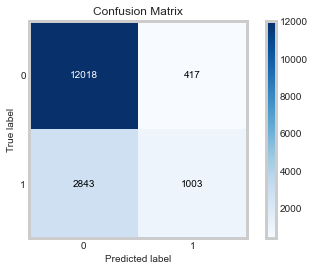

In [60]:
#Evaluation of Logistic Regression Model
#Creating the confusion matrix

import scikitplot 
scikitplot.metrics.plot_confusion_matrix(Ytest,Ypred) 
print()

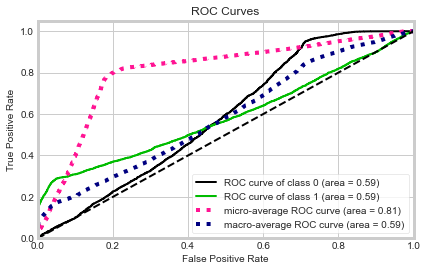

In [61]:
#Receiver Operating Characteristic Curve

scikitplot.metrics.plot_roc(Ytest,Ypred_proba) 

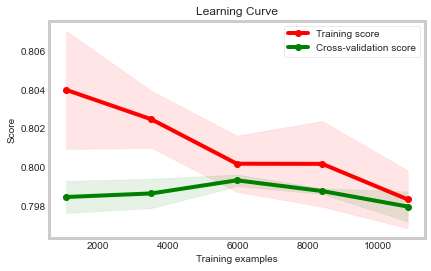

In [62]:
#Learning Curve of Logistic Regression Classifier
scikitplot.estimators.plot_learning_curve(LR,Xtest,Ytest)

In [63]:
print("ROC : ",(metrics.roc_curve(Ytest,Ypred_proba[:,1]))) 
print("AUC : ",(metrics.roc_auc_score(Ytest,Ypred_proba[:,1]))) 

ROC :  (array([0.        , 0.        , 0.        , ..., 0.99943707, 0.99943707,
       1.        ]), array([0.00000000e+00, 2.60010400e-04, 5.20020801e-04, ...,
       9.99739990e-01, 1.00000000e+00, 1.00000000e+00]), array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.27382426e-02, 1.11557685e-02, 1.04584870e-03]))
AUC :  0.5870069760570882


In [64]:
model_accuracy['AUC_Logistic_Regression'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1]) 
from sklearn.metrics import classification_report 
print(classification_report(Ytest,Ypred)) 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12435
           1       0.71      0.26      0.38      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.76      0.61      0.63     16281
weighted avg       0.78      0.80      0.76     16281



In [65]:
#Applying 10 Fold Cross Validation to Logistic Regression Model

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= LogisticRegression(), # Model to test 
                                    X= Features,
                                    y = labels, # Target variable 
                                    scoring = "accuracy", # Scoring metric
                                    cv=10) # Cross validation folds
                                    
print("Accuracy per fold: ") 
print("Cross Validation score: ", scores) 
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Logistic Regression'] = scores.mean() 

Accuracy per fold: 
Cross Validation score:  [0.79815763 0.79713408 0.79979529 0.8024565  0.79488229 0.80118755
 0.80241605 0.79766537 0.79500307 0.79705099]
Average accuracy:  0.7985748831621933


In [67]:
from sklearn.feature_selection import RFE, RFECV 
selector = RFE(estimator=LogisticRegression(), step=1) 
selector.fit(Features,labels) 

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [68]:
ranks = selector.ranking_.tolist() 
ranks 


[1, 2, 8, 4, 1, 1, 3, 1, 1, 1, 7, 6, 1, 5]

In [69]:
df_rank = pd.DataFrame({'Feature':Features.columns,'Rank':ranks}) 
df_rank 

,Feature,Rank
0,age,1
1,workclass,2
2,fnlwgt,8
3,education,4
4,education_num,1
5,marital_status,1
6,occupation,3
7,relationship,1
8,race,1
9,sex,1


In [70]:
#Problem2 what factors are important
imp = df_rank.Feature[df_rank.Rank ==1]
print("The important features in the sample data are as follows:-\n",imp.values)

The important features in the sample data are as follows:-
 ['age' 'education_num' 'marital_status' 'relationship' 'race' 'sex'
 'hours_per_week']


In [71]:
selector = RFECV(estimator=LogisticRegression(), step=1,cv=10) 
selector.fit(Features,labels) 
ranks = selector.ranking_.tolist() 
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks}) 
df_rank_cv 


,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,2
3,education,1
4,education_num,1
5,marital_status,1
6,occupation,1
7,relationship,1
8,race,1
9,sex,1


In [72]:
impcv= df_rank_cv.Feature[df_rank_cv.Rank == 1] 
print("The important Features in the sample data after REFCV are as follows :-\n",impcv.values) 


The important Features in the sample data after REFCV are as follows :-
 ['age' 'workclass' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


In [73]:
# Applying Decision Tree classifier model to the sample data

DT = DecisionTreeClassifier(random_state = 0)
#train the model
DT.fit(X,Y)

#model parameters to study
Ypred = DT.predict(Xtest)
Ypred_proba = DT.predict_proba(Xtest)

#generate evaluation matrix
 
print("Accuracy of Decision Tree Matrix :",metrics.accuracy_score(Ytest,Ypred))


Accuracy of Decision Tree Matrix : 0.7791904674160064


In [74]:
# Decision tree classifier model with max_depth  range 1 to 20

for depth in range(20):
    #build the model
    depth = depth+1
    DT = DecisionTreeClassifier(max_depth = depth,random_state=0)
    #train the model
    DT.fit(X,Y)
    Ypred = DT.predict(Xtest)
    Ypred_proba = DT.predict_proba(Xtest)
    print("Accuracy of decision tree matrix",depth, ":" ,metrics.accuracy_score(Ytest,Ypred))

Accuracy of decision tree matrix 1 : 0.8049259873472145
Accuracy of decision tree matrix 2 : 0.8049259873472145
Accuracy of decision tree matrix 3 : 0.8228610036238561
Accuracy of decision tree matrix 4 : 0.8442356120631411
Accuracy of decision tree matrix 5 : 0.8447884036607088
Accuracy of decision tree matrix 6 : 0.8526503286038941
Accuracy of decision tree matrix 7 : 0.8537559117990295
Accuracy of decision tree matrix 8 : 0.8498249493274369
Accuracy of decision tree matrix 9 : 0.8455868804127511
Accuracy of decision tree matrix 10 : 0.8458939868558443
Accuracy of decision tree matrix 11 : 0.8266077022295928
Accuracy of decision tree matrix 12 : 0.8229224249124747
Accuracy of decision tree matrix 13 : 0.8138934954855352
Accuracy of decision tree matrix 14 : 0.814446287083103
Accuracy of decision tree matrix 15 : 0.7973097475585038
Accuracy of decision tree matrix 16 : 0.7943001044161907
Accuracy of decision tree matrix 17 : 0.7911061974080216
Accuracy of decision tree matrix 18 : 0.7

In [75]:
print("The model gives the accuracy with depth =10")

The model gives the accuracy with depth =10


In [76]:
#The model gives the accuracy with max_depth =10 ,so retrain the model

DT = DecisionTreeClassifier(max_depth = 10,random_state = 0)
#train the model
DT.fit(X,Y)

#model parameters to study
Ypred = DT.predict(Xtest)
Ypred_proba = DT.predict_proba(Xtest)

#generate evaluation matrix
 
print("Accuracy of Decision Tree Matrix :",metrics.accuracy_score(Ytest,Ypred))

model_accuracy['Accuracy score of decision tree classifier model'] = metrics.accuracy_score(Ytest,Ypred)
model_accuracy['AUC of decision tree classifier model with depth 10'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

Accuracy of Decision Tree Matrix : 0.8458939868558443


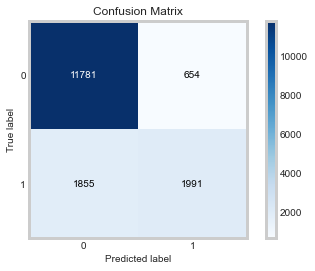

In [77]:
#Evaluation of Decision tree classifier model with max_depth 10
#confusion matrix

scikitplot.metrics.plot_confusion_matrix(Ytest,Ypred)

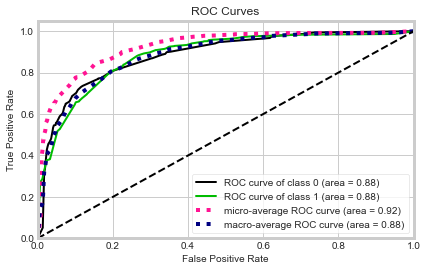

In [78]:
#Reciever operating characterstic curve

scikitplot.metrics.plot_roc(Ytest,Ypred_proba)

In [79]:
print("Generally high scillful model is represented by a curve that blows upto left of the plot")

Generally high scillful model is represented by a curve that blows upto left of the plot


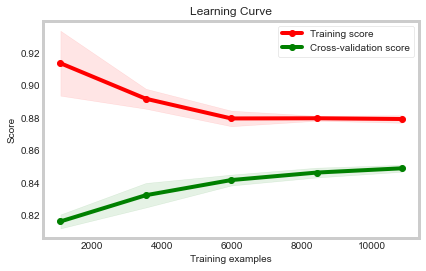

In [80]:
#learning curve Decision tree classifier model with max_depth 10

scikitplot.estimators.plot_learning_curve(DT,Xtest,Ytest)

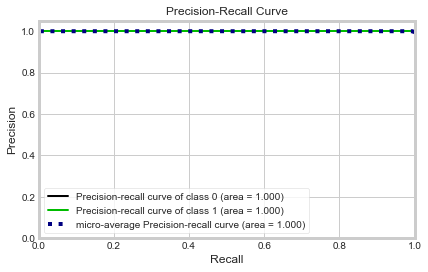

In [81]:
#precision recall curve for decision tree classifier 

scikitplot.metrics.plot_precision_recall(Ypred,Ypred_proba)

In [82]:
#Applying 10th fold cross validation to Decision tree classifier model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = DecisionTreeClassifier(random_state= 0),#model to test
                        X = Features,y = labels,scoring = "accuracy" , cv =10 )

print("Accuracy per fold:")
print("Cross validation score:",scores)
print("Average accuracy :",scores.mean())

Accuracy per fold:
Cross validation score: [0.81412487 0.80409417 0.79918117 0.81576254 0.8198567  0.82002457
 0.81183456 0.81056727 0.80298997 0.80114684]
Average accuracy : 0.8099582654510253


In [83]:
for depth in range(20):
    depth = depth+1
    scores = cross_val_score(estimator = DecisionTreeClassifier(max_depth = depth,random_state = 0),
    X = Features ,y = labels, scoring = "accuracy" ,cv =10)
    print("Average accuracy for max_depth",depth,":",scores.mean())
    

Average accuracy for max_depth 1 : 0.8033863622153798
Average accuracy for max_depth 2 : 0.8033863622153798
Average accuracy for max_depth 3 : 0.8117204714601914
Average accuracy for max_depth 4 : 0.8436592070752982
Average accuracy for max_depth 5 : 0.8434543772200916
Average accuracy for max_depth 6 : 0.8511731499742388
Average accuracy for max_depth 7 : 0.8550838035426557
Average accuracy for max_depth 8 : 0.8553704077272684
Average accuracy for max_depth 9 : 0.8557592780136549
Average accuracy for max_depth 10 : 0.8562916034336181
Average accuracy for max_depth 11 : 0.854837851779951
Average accuracy for max_depth 12 : 0.8537116711209058
Average accuracy for max_depth 13 : 0.8505178403150028
Average accuracy for max_depth 14 : 0.8479992953238906
Average accuracy for max_depth 15 : 0.8452355573159268
Average accuracy for max_depth 16 : 0.8420209370688296
Average accuracy for max_depth 17 : 0.8404647767403342
Average accuracy for max_depth 18 : 0.836758751796696
Average accuracy for 

In [84]:
print("The cross validation score for Decision Tree Classifier is the most optimum for max_depth is 12")

The cross validation score for Decision Tree Classifier is the most optimum for max_depth is 12


In [85]:
scores = cross_val_score(estimator = DecisionTreeClassifier(max_depth=12,random_state =0),
                         X=Features,
                         y=labels,
                         scoring="accuracy",
                        cv=10)
print("Accuracy per fold:")
print("Cross Validation Score:",scores)
print('Average Accuracy:',scores.mean())
model_accuracy["10 cv score Decision Tree Classifier ,max_depth=12"] = scores.mean()

Accuracy per fold:
Cross Validation Score: [0.85342886 0.85486182 0.84769703 0.86079836 0.86305015 0.8548321
 0.84459459 0.85254966 0.85459758 0.85070653]
Average Accuracy: 0.8537116711209058


In [86]:
#Feature selection usinf REFCV for Decision Tree classifier
selector = RFECV(estimator = DecisionTreeClassifier(max_depth=12,random_state=0),step=1,cv=10)
selector.fit(Features,labels)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,2
1,workclass,7
2,fnlwgt,4
3,education,5
4,education_num,1
5,marital_status,1
6,occupation,6
7,relationship,10
8,race,11
9,sex,8


In [87]:
impcvDT = df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important features in the sample data after REFCV are as follows :-\n ",impcvDT.values)

The important features in the sample data after REFCV are as follows :-
  ['education_num' 'marital_status' 'capital_gain' 'capital_loss']


In [88]:
#Applying K-Nearest model to data

from sklearn.neighbors import KNeighborsClassifier

In [89]:
k= []
scores = []
errors = []
for K in range(30):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors=K_value,weights = 'uniform',algorithm ='auto')
    neigh.fit(X,Y)
    y_pred = neigh.predict(Xtest)
    print("Accuracy is",metrics.accuracy_score(Ytest,y_pred)*100,"% for K-value:",K_value)
    print("Error is",100-metrics.accuracy_score(Ytest,y_pred)*100,"% for K-value",K_value)
    k.append(K_value)
    scores.append(metrics.accuracy_score(Ytest,y_pred)*100)
    errors.append(1-metrics.accuracy_score(Ytest,y_pred))

Accuracy is 72.64910017812174 % for K-value: 1
Error is 27.350899821878258 % for K-value 1
Accuracy is 78.50254898347767 % for K-value: 2
Error is 21.497451016522334 % for K-value 2
Accuracy is 75.922854861495 % for K-value: 3
Error is 24.077145138505003 % for K-value 3
Accuracy is 79.03077206559793 % for K-value: 4
Error is 20.96922793440207 % for K-value 4
Accuracy is 77.58737178306001 % for K-value: 5
Error is 22.412628216939993 % for K-value 5
Accuracy is 79.31945212210553 % for K-value: 6
Error is 20.68054787789447 % for K-value 6
Accuracy is 78.46569621030649 % for K-value: 7
Error is 21.53430378969351 % for K-value 7
Accuracy is 79.54671088999447 % for K-value: 8
Error is 20.453289110005528 % for K-value 8
Accuracy is 78.92021374608439 % for K-value: 9
Error is 21.079786253915614 % for K-value 9
Accuracy is 79.81696455991647 % for K-value: 10
Error is 20.18303544008353 % for K-value 10
Accuracy is 79.46686321479025 % for K-value: 11
Error is 20.53313678520975 % for K-value 11
Ac

Text(0.5, 1.0, 'K value Vs Accuracy')

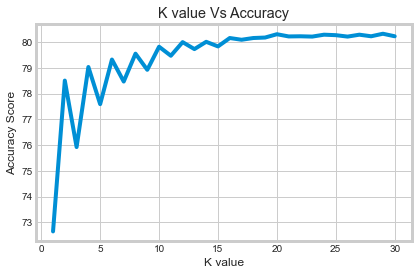

In [90]:
plt.plot(k,scores)
plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.title('K value Vs Accuracy')

In [91]:
print("It is evident that from the plot k value after 20 yields almost same performance, hence k=20 is optimum ")

It is evident that from the plot k value after 20 yields almost same performance, hence k=20 is optimum 


Text(0.5, 1.0, 'K value vs errors')

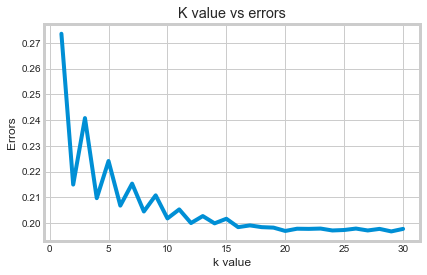

In [92]:
plt.plot(k,errors)
plt.xlabel('k value')
plt.ylabel('Errors')
plt.title('K value vs errors')

In [93]:
print('The errors gradually decreses with increase in K values and does not reduce further after K=20.It becomes constant.Hence optimum K value =20')

The errors gradually decreses with increase in K values and does not reduce further after K=20.It becomes constant.Hence optimum K value =20


In [96]:
knn = KNeighborsClassifier(n_neighbors = 20,weights='uniform',algorithm ='auto')
knn.fit(X,Y)
Ypred = knn.predict(Xtest)
Ypred_proba = knn.predict_proba(Xtest)
#Generate evaluation metrics
print("Accuracy of Knn classifier:",metrics.accuracy_score(Ytest,Ypred))
model_accuracy['Accuracy score of KNN classifiers Neighbors-20']=metrics.accuracy_score(Ytest,Ypred)
model_accuracy['AUC of KNN classifiers Neighbors-20']=metrics.roc_auc_score(Ytest,Ypred_proba[:,1])

Accuracy of Knn classifier: 0.8030219274000369


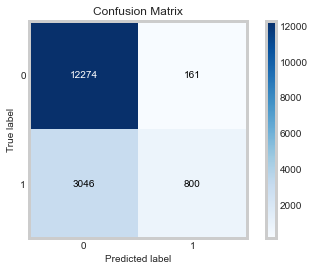

In [98]:
#Evaluation of K neighbors for K=20
#Creating Confusion Matrix

scikitplot.metrics.plot_confusion_matrix(Ytest,Ypred)

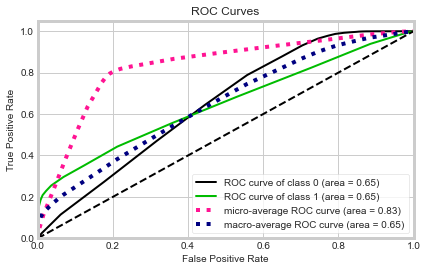

In [99]:
#Reciever operating characteristic curve
scikitplot.metrics.plot_roc(Ytest,Ypred_proba)

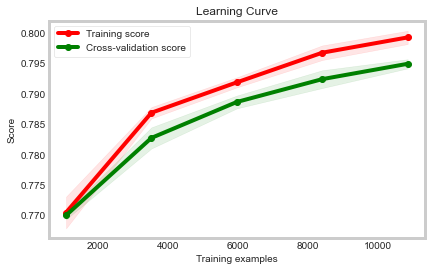

In [100]:
#Learning curve for classifier model
scikitplot.estimators.plot_learning_curve(knn,Xtest,Ytest)

In [105]:
# 10 fold cross validation applied to K neighbors model
from sklearn import datasets ,linear_model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = KNeighborsClassifier(n_neighbors=20,weights = 'uniform',algorithm= 'auto'),#model to test
                       X=Features,
                        y=labels,#target variable
                         scoring= 'accuracy',  #scoring metric
                         cv =10 #cross validation fold
                        )
print('Accuracy per fold:')
print("Cross Validation Scores:",scores)
print("Average accuracy:",scores.mean())
model_accuracy['10 cv Score KNN clssifiers neighbors-20']=scores.mean()

Accuracy per fold:
Cross Validation Scores: [0.80143296 0.80225179 0.80429887 0.8024565  0.79959058 0.7993448
 0.80446355 0.80012288 0.79746058 0.79971329]
Average accuracy: 0.8011135803856995


In [107]:
print("KNN does not provide logic  to do feature selection")

KNN does not provide logic  to do feature selection


Predictions: [0 0 0 ... 0 1 0]
Predictions Probabilities: [[0.77070977 0.22929023]
 [0.70650743 0.29349257]
 [0.84890371 0.15109629]
 ...
 [0.89050391 0.10949609]
 [0.30716017 0.69283983]
 [0.82077007 0.17922993]]
Accuracy score of bagging for single logistic regression model  : 0.798968122351207


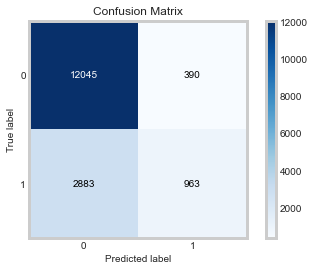

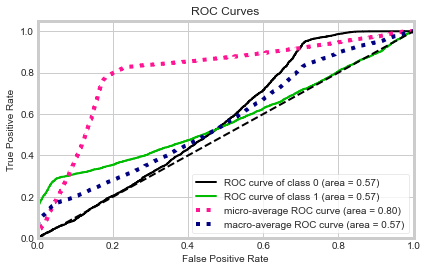

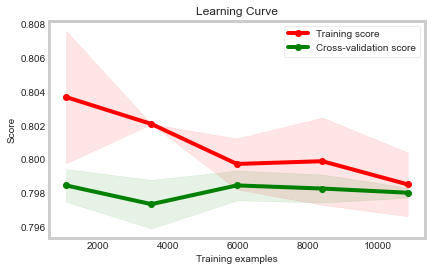

In [110]:
# Ensemble Model Bagging technique
#Bagging with logistic Regression

from sklearn.ensemble import BaggingClassifier
import scikitplot
bag_LR = BaggingClassifier(LogisticRegression(),n_estimators =10,max_samples=0.5,bootstrap=True,random_state=3)
bag_LR.fit(X,Y)

#####Predictions by the Bagging Ensemble model
bag_preds= bag_LR.predict(Xtest)
print("Predictions:",bag_preds)

bag_preds_proba= bag_LR.predict_proba(Xtest)
print("Predictions Probabilities:",bag_preds_proba)

#score of bagging ensemble model
bag_LR.score(Xtest,Ytest)

print('Accuracy score of bagging for single logistic regression model  :', metrics.accuracy_score(Ytest,bag_preds))
      
#######Confusion matrix

scikitplot.metrics.plot_confusion_matrix(Ytest,bag_preds)
      
#####ROC

scikitplot.metrics.plot_roc(Ytest,bag_preds_proba)
model_accuracy['Accuracy Score Bagging Logistic Regression '] = metrics.accuracy_score(Ytest,bag_preds)
model_accuracy['AUC  Bagging Logistic Regression '] = metrics.roc_auc_score(Ytest,bag_preds_proba[:,1])

scikitplot.estimators.plot_learning_curve(bag_LR,Xtest,Ytest)

Prediction: [0 0 0 ... 0 0 0]
Prediction Probabilities: [[0.675 0.325]
 [0.735 0.265]
 [0.855 0.145]
 ...
 [0.815 0.185]
 [0.54  0.46 ]
 [0.865 0.135]]
Accuracy Score of Bagging for single KNN model: 0.7989067010625883


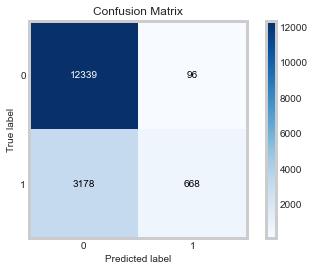

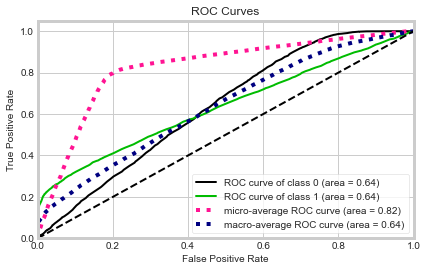

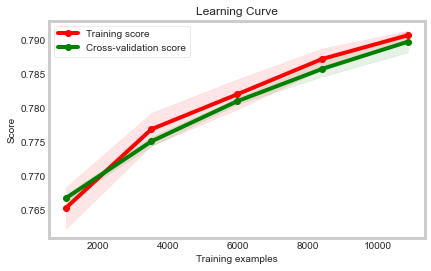

In [116]:
#Bagging with KNN Model

from sklearn.ensemble import BaggingClassifier 
bag_KNN = BaggingClassifier(KNeighborsClassifier(n_neighbors = 20, weights='uniform',algorithm='auto'),n_estimators=10,max_samples=0.5,bootstrap=True,random_state=3)
bag_KNN.fit(X,Y)

#Predictions by the Bagging Ensemble model
bag_preds =bag_KNN.predict(Xtest)
print("Prediction:",bag_preds)

bag_preds_proba =bag_KNN.predict_proba(Xtest)
print("Prediction Probabilities:",bag_preds_proba)

#Score of the bagging ensemble model
bag_KNN.score(Xtest,Ytest)
print("Accuracy Score of Bagging for single KNN model:",metrics.accuracy_score(Ytest,bag_preds))


#Confusion Matrix
scikitplot.metrics.plot_confusion_matrix(Ytest,bag_preds)


scikitplot.metrics.plot_roc(Ytest,bag_preds_proba)
model_accuracy['Accuracy Score-Bagging-KNN neighbores-20']=metrics.accuracy_score(Ytest,bag_preds)
model_accuracy['AUC-Bagginhg-KNN neighbors-20'] = metrics.roc_auc_score(Ytest,bag_preds_proba[:,1])
scikitplot.estimators.plot_learning_curve(bag_KNN,Xtest,Ytest)



accuracy of Random Forest Classifier : 0.8253178551686015
accuracy of Random forest Classifier : 0.8290645537743382
AUC for Random Forest Classifier :  0.843140931909894


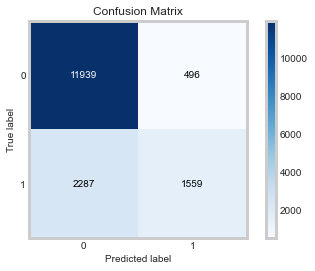

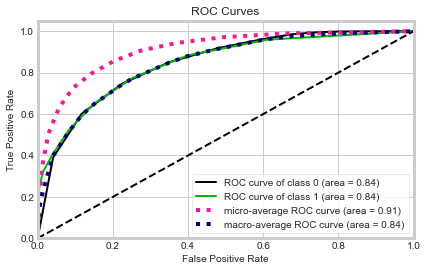

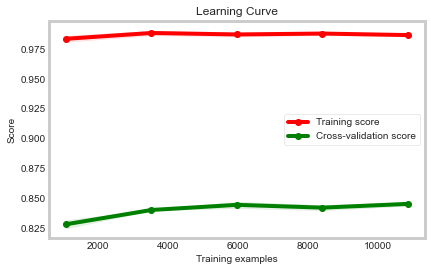

In [117]:
#RANDOM FOREST CLASSIFIER model


from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier() 
RF.fit(X,Y) 
Ypred = RF.predict(Xtest) 
Ypred_proba = RF.predict_proba(Xtest) 
print("accuracy of Random Forest Classifier :",metrics.accuracy_score(Ytest, Ypred))
model_accuracy['Accuracy score of Random Forest Classifier'] = metrics.accuracy_score(Ytest, Ypred) 

from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier()
RF.fit(X,Y)
Ypred = RF.predict(Xtest)
Ypred_proba=RF.predict_proba(Xtest)
print("accuracy of Random forest Classifier :",metrics.accuracy_score(Ytest,Ypred))
model_accuracy['Accuracy Score of Random Forest Classifier'] = metrics.accuracy_score(Ytest,Ypred)


#Evaluate the Random Forest Model
#Creating confusion matrix
scikitplot.metrics.plot_confusion_matrix(Ytest,Ypred)

#Reciver Operating Characteristic Curve for Random Forest Model
scikitplot.metrics.plot_roc(Ytest,Ypred_proba)

#Learning Curve
scikitplot.estimators.plot_learning_curve(RF,Xtest,Ytest) 

print("AUC for Random Forest Classifier : ",metrics.roc_auc_score(Ytest,Ypred_proba[:,1]))
model_accuracy['AUC for Random Forest Classifier'] = metrics.roc_auc_score(Ytest,Ypred_proba[:,1]) 


In [119]:
#Feature Selection using featureimportances parameter of Random Forest Model
RF.fit(Xtest, Ytest) 
print("Features sorted by their score:") 
print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), Features.columns),reverse=True)) 


Features sorted by their score:
[(0.1672, 'age'), (0.1657, 'fnlwgt'), (0.1061, 'capital_gain'), (0.0917, 'hours_per_week'), (0.0882, 'education_num'), (0.0726, 'occupation'), (0.0715, 'relationship'), (0.0672, 'marital_status'), (0.0464, 'education'), (0.0406, 'workclass'), (0.0322, 'capital_loss'), (0.0192, 'native_country'), (0.0166, 'sex'), (0.0149, 'race')]


In [124]:

selector = RFECV(estimator=RandomForestClassifier(),step=1,cv=10)
selector.fit(Features,labels)
ranks =selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':Features.columns,'Rank':ranks})
impcvRF =df_rank_cv.Feature[df_rank_cv.Rank ==1]
print("The importance Features in the sample data after REFCV are as follows :-\n", impcvRF.values)
                            

The importance Features in the sample data after REFCV are as follows :-
 ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


In [127]:
#Fold Cross Validation for Random Forest Classifier
from sklearn import datasets, linear_model 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(estimator= RandomForestClassifier(), # Model to test
                         X= Features,
                            y = labels, # Target variable 
                         scoring = "accuracy", # Scoring metric
                            cv=10) # Cross validation folds

print("Accuracy per fold: ") 
print("Cross Validation score: ", scores) 
print("Average accuracy: ", scores.mean()) 
model_accuracy['10 CV Score-Random Forest Classifier'] = scores.mean()



Accuracy per fold: 
Cross Validation score:  [0.85076766 0.84974411 0.85506653 0.85158649 0.8517912  0.8503276
 0.8478706  0.84783944 0.84620111 0.85050174]
Average accuracy:  0.850169647549178


In [ ]:
#Using Boosting Method of Ensemble model to predict the annual income

In [128]:
from xgboost.sklearn import XGBClassifier 
#set the parameters for the xgbosst model 
params = { 'objective': 'binary:logistic', 'max_depth': 2, 'learning_rate': 1.0, 'silent': 1.0, 'n_estimators': 5 }
params['eval_metric'] = ['logloss', 'auc']


In [129]:
#Train the XGBClassifier model
bst = XGBClassifier(**params).fit(X,Y)

[18:41:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [131]:
#Predict the annual income
preds = bst.predict(Xtest)
preds
preds_proba = bst.predict_proba(Xtest)
preds_proba

array([[0.9862895 , 0.01371049],
       [0.4968602 , 0.5031398 ],
       [0.8749048 , 0.1250952 ],
       ...,
       [0.282     , 0.718     ],
       [0.28114867, 0.7188513 ],
       [0.282     , 0.718     ]], dtype=float32)

In [132]:
#Measure the accuracy of the model
correct = 0 
from sklearn.metrics import accuracy_score 
for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1

acc = accuracy_score(Ytest, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Accuracy Score :{:.4f}'.format(acc)) 
print('Error: {0:.4f}'.format(1-acc)) 
model_accuracy['Accuracy Score of XGBOOST Model'] = acc

Predicted correctly: 13686/16281
Accuracy Score :0.8406
Error: 0.1594


In [133]:
from sklearn.metrics import classification_report 
print(classification_report(Ytest,preds)) 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.75      0.49      0.59      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.80      0.72      0.75     16281
weighted avg       0.83      0.84      0.83     16281



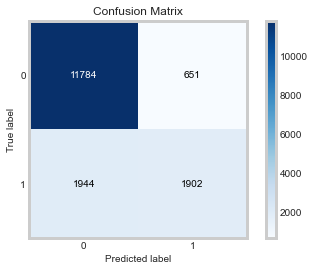

In [135]:
#Confusion matrix
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(Ytest, preds) 

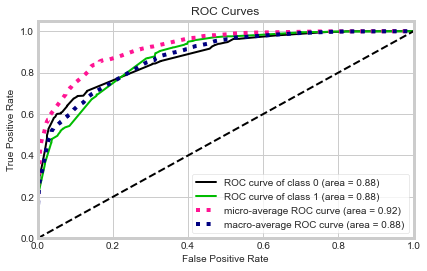

In [136]:
scikitplot.metrics.plot_roc(Ytest,preds_proba)

[18:53:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:53:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:53:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

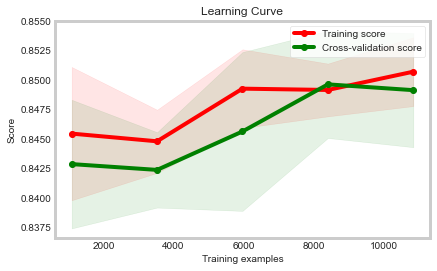

In [138]:
#Learning Curve
scikitplot.estimators.plot_learning_curve(bst,Xtest,Ytest)

In [139]:
print('AUC for XGBOOST model : ',metrics.roc_auc_score(Ytest,preds_proba[:,1])) 
model_accuracy['AUC for XGBOOST model'] = metrics.roc_auc_score(Ytest,preds_proba[:,1])

AUC for XGBOOST model :  0.878705942769275


In [141]:
features = [] 
scores = [] 
for k,v in model_accuracy.items():
    features.append(k)
    scores.append(v) 
    df_scores = pd.DataFrame({'Features':features,'Scores':scores}) 
    feat_cols = ['Features','Scores'] 
    df_scores = df_scores[feat_cols] 
df_scores 

,Features,Scores
0,Logistic Regression,0.799767
1,AUC_Logistic_Regression,0.587007
2,10 CV Score-Logistic Regression,0.798575
3,Accuracy score of decision tree classifier model,0.845894
4,AUC of decision tree classifier model with dep...,0.883424
5,"10 cv score Decision Tree Classifier ,max_dept...",0.853712
6,Accuracy score of KNN classifiers Neighbors-20,0.803022
7,AUC of KNN classifiers Neighbors-20,0.648351
8,10 cv Score KNN clssifiers neighbors-20,0.801114
9,Accuracy Score Bagging Logistic Regression,0.798968


In [ ]:
#problem 3 - Which algorithms are best for this dataset

In [144]:
print("From the above Model Estimation Score dataframe if we take into consideration the AUC value then it is evident that the Decision Tree Classifier Model and XGBOOST ensemble model have the highest accuracy for the model performance.\n\n")

print('AUC of Decision Tree Model Classifier - depth-10 is 88.34%') 
print('AUC for XGBOOST model is 87.87%') 
print('AUC for Random Forest Classifier is 85.04%') 
print('AUC of KNN Classifier neighbors-20 is 64.83%') 
print('AUC-Bagging-KNN neighbors -20 is 63.55%') 
print('AUC_Logistic_Regression is 58.70%') 
print('AUC-Bagging-Logistic Regression is 57.38%')

From the above Model Estimation Score dataframe if we take into consideration the AUC value then it is evident that the Decision Tree Classifier Model and XGBOOST ensemble model have the highest accuracy for the model performance.


AUC of Decision Tree Model Classifier - depth-10 is 88.34%
AUC for XGBOOST model is 87.87%
AUC for Random Forest Classifier is 85.04%
AUC of KNN Classifier neighbors-20 is 64.83%
AUC-Bagging-KNN neighbors -20 is 63.55%
AUC_Logistic_Regression is 58.70%
AUC-Bagging-Logistic Regression is 57.38%
